In [1]:
import supy as sp
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from gr_recalc import gr_recalc

In [2]:
# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

#df_state_init.loc[1]

# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 


forcing_2017 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2017_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

forcing_2018 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2018_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

#sp.load_forcing_grid sätter Datetime som index på forcing data, samst läser in all forcing data!

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

#sp.check för kolla så att forcing funkar
sp.check_forcing(df_forcing)
#df_forcing

2021-03-19 15:02:03,185 - SuPy - INFO - All cache cleared.
2021-03-19 15:02:07,558 - SuPy - INFO - All cache cleared.
2021-03-19 15:02:14,115 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-03-19 15:02:21,871 - SuPy - INFO - All checks for `df_forcing` passed!


In [18]:

df_state_init = sp.init_supy(path_runcontrol)
df_forcing = sp.load_forcing_grid(path_runcontrol, 1)

base_roof = df_state_init.copy().loc[1] # Base scenario 0% Green roof
green_roof= df_state_init.copy().loc[2] # Green Roof scenario 100%

## Scenario 75% Green Roof
df_state_init.loc[4] = green_roof.copy()
df_state_init.loc[4].storedrainprm.iloc[15] =  #drainagecoef1 i nonveg
df_state_init.loc[4].storedrainprm.iloc[22] =  #drainagecoef2 i nonveg
# df_state_init.loc[4] = gr_recalc(df_state_init.loc[4], base_roof, green_roof, .25, .75)

## Scenario 50% Green Roof
df_state_init.loc[5] = green_roof.copy()
df_state_init.loc[5] = gr_recalc(df_state_init.loc[5], base_roof, green_roof, .50, .50)

## Scenario 25% green Roof
df_state_init.loc[6] = green_roof.copy()
df_state_init.loc[6] = gr_recalc(df_state_init.loc[6], base_roof, green_roof, .75, .25)

## Scenario 10% green Roof
df_state_init.loc[7]= green_roof.copy()
df_state_init.loc[7] = gr_recalc(df_state_init.loc[7], base_roof, green_roof, .90, .10)


2021-03-18 10:22:15,399 - SuPy - INFO - All cache cleared.
2021-03-18 10:22:18,464 - SuPy - INFO - All cache cleared.


In [1]:
#df_state_init.loc[4].alb[1]

In [3]:
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

base    = df_output.loc[1].SUEWS # 0% Green Roof
gr_100  = df_output.loc[2].SUEWS # 100% Green Roof

# 75% Green Roof
gr_75   = base.copy()
gr_75[:]   = np.average([base,gr_100],weights=[0.25, 0.75],axis=0)

# 50% Green Roofgr_50   = base.SUEWS.copy()
gr_50   = base.copy()
gr_50[:]   = np.average([base,gr_100],weights=[0.50, 0.50],axis=0)

# 25% Green Roofgr_25   = base.SUEWS.copy()
gr_25   = base.copy()
gr_25[:]   = np.average([base,gr_100],weights=[0.75, 0.25],axis=0)

# 10% Green Roofgr_10   = base.SUEWS.copy()
gr_10   = base.copy()
gr_10[:]   = np.average([base,gr_100],weights=[0.90, 0.10],axis=0)

 

df_merge = pd.concat([base, gr_100, gr_75, gr_50, gr_25, gr_10],axis=1,join='inner',keys=['base','gr_99','gr_75','gr_50','gr_25','gr_10']).swaplevel(0,-1,axis=1).sort_index(axis=1)

2021-03-19 15:02:21,930 - SuPy - INFO - ====================
2021-03-19 15:02:21,934 - SuPy - INFO - Simulation period:
2021-03-19 15:02:21,940 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-03-19 15:02:21,944 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-03-19 15:02:21,953 - SuPy - INFO - 
2021-03-19 15:02:21,960 - SuPy - INFO - No. of grids: 3
2021-03-19 15:02:21,965 - SuPy - INFO - SuPy is running in parallel mode
2021-03-19 15:04:39,578 - SuPy - INFO - Execution time: 137.6 s
2021-03-19 15:04:39,640 - SuPy - INFO - ====================



In [34]:
#df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

#base    = df_output.loc[1] # 0% Green Roof
#gr_100  = df_output.loc[2] # 100% Green Roof
#gr_75   = df_output.loc[4] # 75% Green Roof
#gr_50   = df_output.loc[5] # 50% Green Roof
#gr_25   = df_output.loc[6] # 25% Green Roof
#gr_10   = df_output.loc[7] # 10% Green Roof

#df_output_merge_x=pd.concat([base, gr_100, gr_75, gr_50, gr_25, gr_10],axis=1,join='inner',keys=['base','gr_100','gr_75','gr_50','gr_25',#'gr_10']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

#df_merge = df_output_merge_x.SUEWS

In [20]:

#df_merge.loc[s:e,'QS'].head()

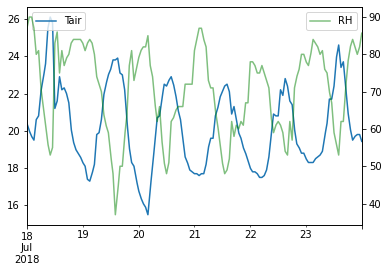

In [30]:
s = '2018 07 18'
e = '2018 07 23'
ax  =df_forcing.loc[s:e,'Tair'].plot()
ax2 = ax.twinx()
ax2  =df_forcing.loc[s:e,'RH'].plot(ax = ax2, color='g', alpha = 0.5)
ax.legend(loc='upper left')
ax2.legend()

<AxesSubplot:xlabel='datetime'>

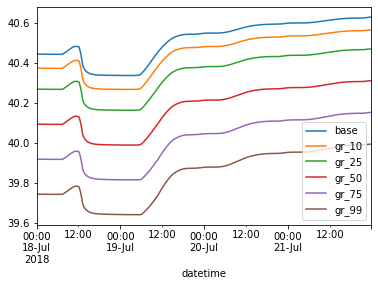

In [4]:
s = '2018 07 18'
e = '2018 07 21'
df_merge.loc[s:e, 'SMD'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='24b85063-7b50-477e-be30-530601598c86'>)

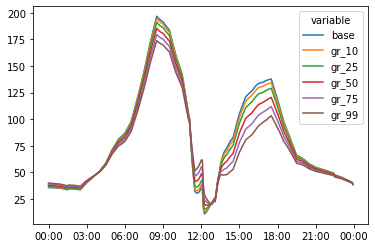

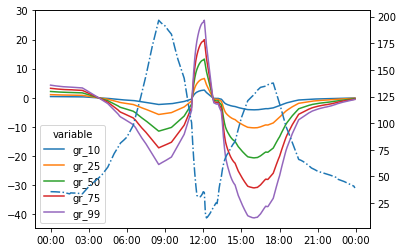

In [5]:
s = '2018 07 18'
e = '2018 07 18'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='150d166d-b2fd-4071-bb36-81c9e1c9da48'>)

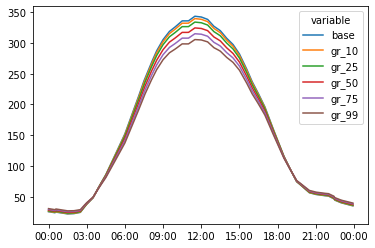

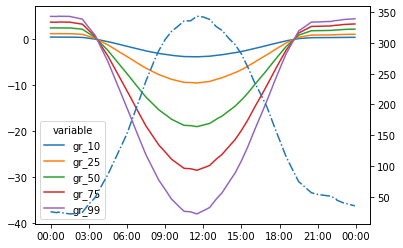

In [6]:
s = '2018 07 02'
e = '2018 07 02'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='57cfd1fb-4861-4364-9f30-d061252907ad'>)

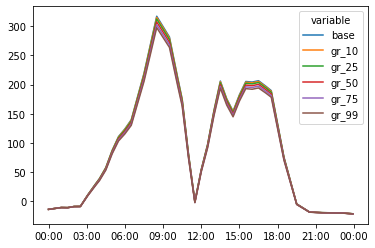

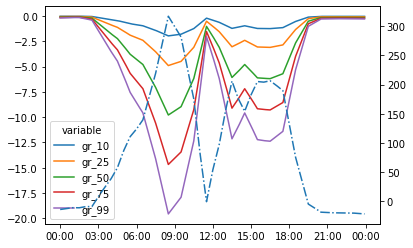

In [7]:
s = '2018 07 18'
e = '2018 07 18'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QN'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QN'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='3ebddea6-e607-4986-ae33-534c2d3ee3dc'>)

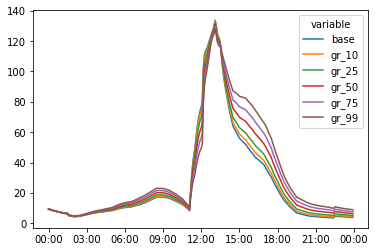

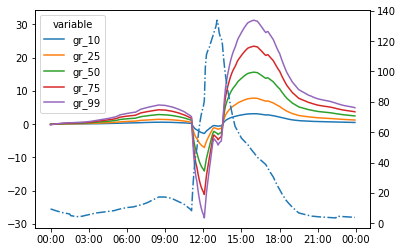

In [8]:
s = '2018 07 18'
e = '2018 07 18'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='b8e9c3f9-5f0a-4287-bc69-5d1d2bf5906f'>)

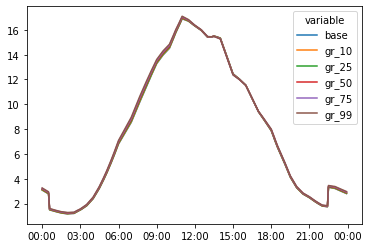

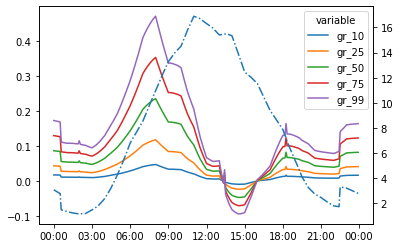

In [9]:
s = '2018 07 02'
e = '2018 07 02'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'], show_dif =True, col_ref =('base'))

<AxesSubplot:xlabel='datetime'>

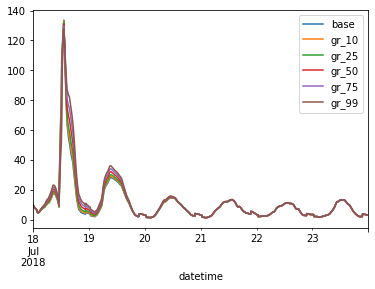

In [10]:
s = '2018 07 18'
e = '2018 07 23'
df_merge.loc[s:e, 'QE'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='a17019fb-f348-4855-9ba2-2f1a1230b9d3'>)

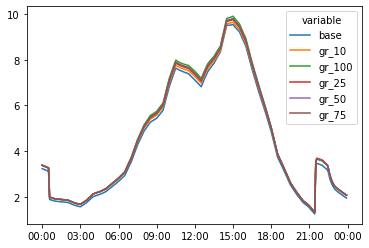

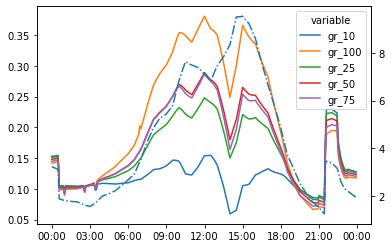

In [53]:
s = '2018 07 15'
e = '2018 07 15'

sp.util.plot_day_clm(df_merge.loc[s:e,'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QE'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='21344d1c-7874-4ab0-96b1-888e511f21b5'>)

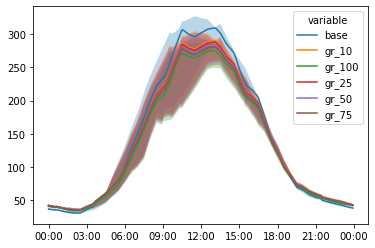

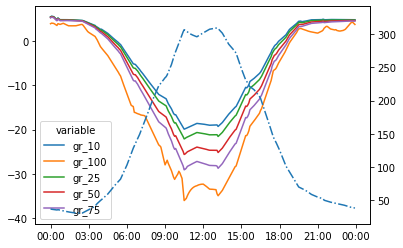

In [64]:
s = '2018 07 18'
e = '2018 07 23'
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='89c0ca16-99bc-447b-a9e2-892c31f9a600'>)

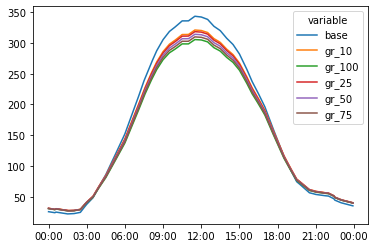

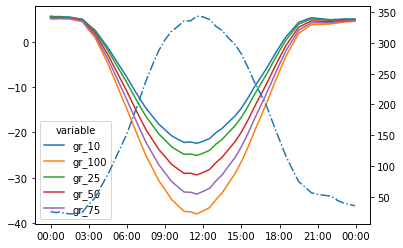

In [60]:
s = '2018 07 02'
e = '2018 07 02'
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'],show_dif =True, col_ref =('base'))

<AxesSubplot:xlabel='datetime'>

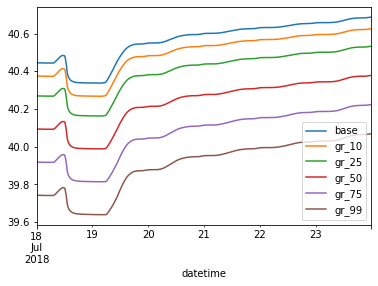

In [11]:
s = '2018 07 18'
e = '2018 07 23'
df_merge.loc[s:e, 'SMD'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='fbdf07f8-86fb-4955-96b1-ec69367ce52e'>)

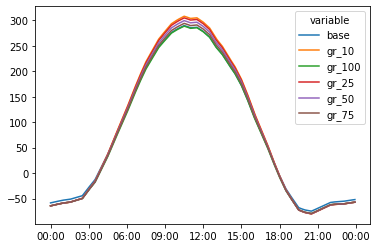

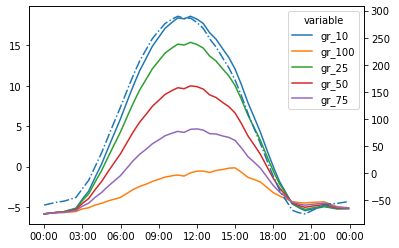

In [58]:
s = '2018 07 02'
e = '2018 07 02'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='455335e0-c5e7-4499-ac2f-d2fac7381d67'>)

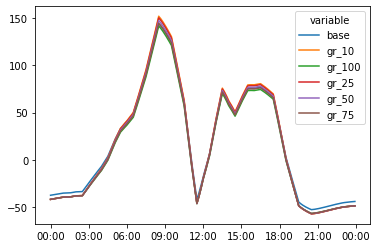

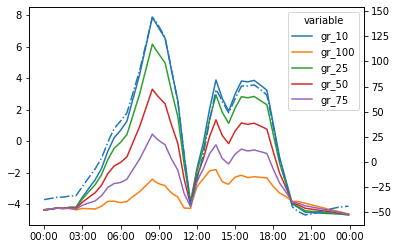

In [59]:
s = '2018 07 18'
e = '2018 07 18'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='dd867922-7d70-4bec-aef4-9245d4105d7f'>)

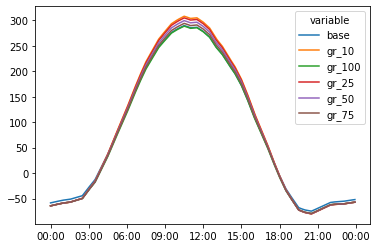

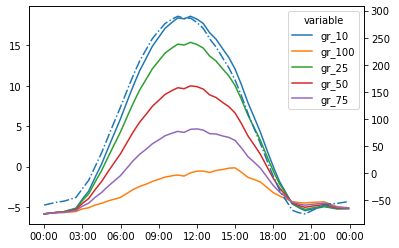

In [63]:
s = '2018 07 02'
e = '2018 07 02'

sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QS'], show_dif =True, col_ref =('base'))